<a href="https://colab.research.google.com/github/yubinvip/Hung-yi-Lee-AI2024/blob/main/HW3_%E4%BB%A5API%E5%BF%AB%E9%80%9F%E6%90%AD%E5%BB%BA%E8%87%AA%E5%B7%B1%E7%9A%84%E6%87%89%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3 以API快速搭建自己的應用
Objective:
- Understand how to build your own Language Model Application by calling API and feeding prompts.

In this homework, you only need to choose **ONE** API.
- **Gemini**: Free but slower.
- **ChatGPT**: Faster but may cause you money, make sure you have some free usage.


**Homework slide**: https://docs.google.com/presentation/d/1fAXUpvAxmTQEQrIhJxcPz4AlAhY5hLsC6b9p5TrMAIU/edit?usp=sharing

**To Start:**
Hit one of these two buttons to unfold the blcoks.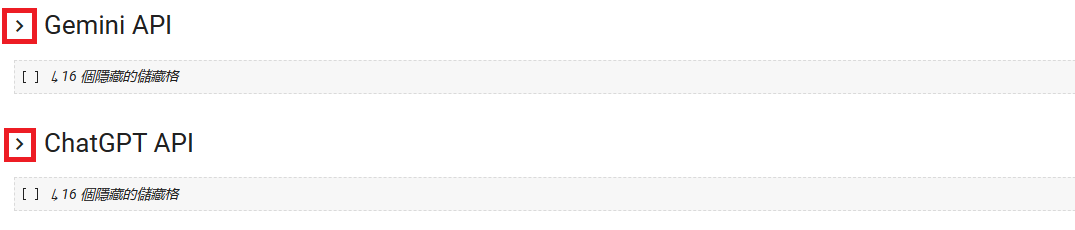

**Remember**, if you decide to use gemini. You should only execute the code blocks under **"Gemini API"**. You can use the **目錄** in the left side to locate youself.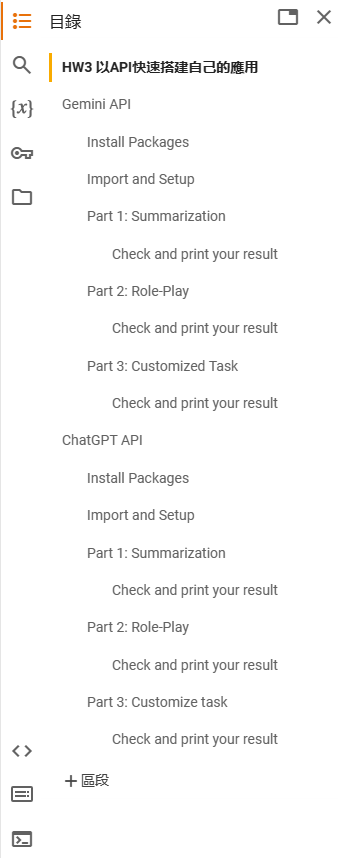

If you have any questions, please contact the TAs via TA hours, NTU COOL, or email to ntu-gen-ai-2024-spring-ta@googlegroups.com

# Gemini API

## Install Packages
Install all the necessary packages, it may take some time.

In [ ]:
# Install required packages
!pip3 install gradio
!pip install -q -U google-generativeai

## Import and Setup
**Remember to fill in your Gemini API in this block, the tutorial to get the API is in our homework 3 slides. <br>Please make sure not to share your API with anyone else.**

In [ ]:
# Import packages
import google.generativeai as genai
from typing import List, Tuple
import gradio as gr
import json

# Set up Gemini API key
## TODO: Fill in your Gemini API in the ""
GOOGLE_API_KEY=""
genai.configure(api_key=GOOGLE_API_KEY)
model = genai.GenerativeModel('gemini-pro')

# Check if you have set your Gemini API successfully
# You should see "Set Gemini API sucessfully!!" if nothing goes wrong.
try:
    model.generate_content(
      "test",
    )
    print("Set Gemini API sucessfully!!")
except:
    print("There seems to be something wrong with your Gemini API. Please follow our demonstration in the slide to get a correct one.")

## Part 1: Summarization

In this task, you are asked to prompt your chatbot into a **summarizer.** Its job is when the user inputs an article, it can summarize the article for the user.

You need to:
1. Come up with a prompt for summarization and fill it in **prompt_for_summarization**.
2. **Hit the run buttonimage.png. (The run button will turn into this stateimage.png when sucessfully executed.)** An interface wiill pop up and it will look like this: (It may look a little bit different if you use dark mode.)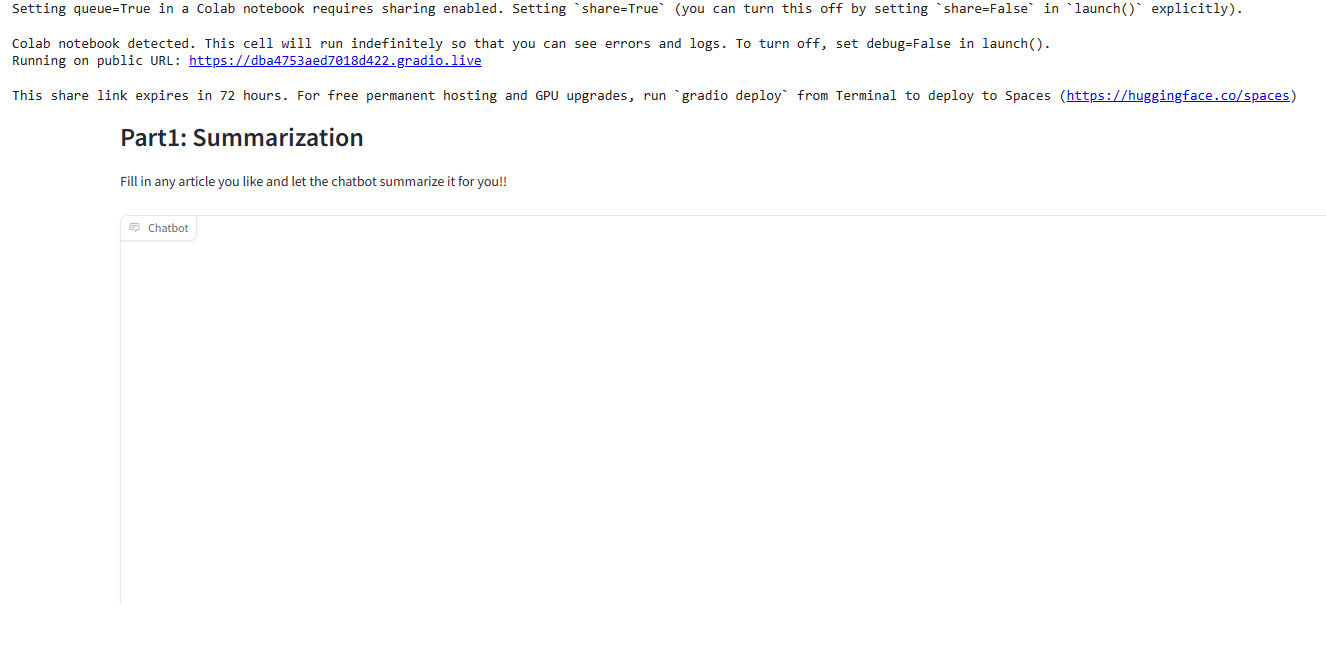
3. Find an article on your own or use our example article, and fill it in the block named "Article".
4. Hit the "Send" button to produce the summarization. (You can use the "Temperature" slide to control the creativeness of the output.)
5. If you **want to change your prompt**, hit the run button again to stop the cell. Then go back to step 1.
6. After you get the desired result, hit the button "Export" to save your result. There will be a file named part1.json appears in the file list. **Remember to download it to your own computer before it disappears.**

Note:


*  **If you hit the "Export" button again, the previous result will be covered, so make sure to download it first.**
*  **You should keep in mind that even with the exact same prompt, the output might still differ.**


---


Before you run this cell, make sure you have run both **Install Packages** and **Import and Setup**.

**Remember to stop this cell before you go on to the next one.**
image.png means the cell is  running, image.png means the cell is idle.

In [ ]:
## TODO: Input the prompt in the ""
prompt_for_summarization = "FILL IN YOUR PROMPT"

# function to clear the conversation
def reset() -> List:
    return []

# function to call the model to generate
def interact_summarization(prompt: str, article: str, temp = 1.0) -> List[Tuple[str, str]]:
    '''
      * Arguments

        - prompt: the prompt that we use in this section

        - article: the article to be summarized

        - temp: the temperature parameter of this model. Temperature is used to control the output of the chatbot.
                The higher the temperature is, the more creative response you will get.
    '''
    input = f"{prompt}\n{article}"
    response = model.generate_content(
      input,
      generation_config=genai.types.GenerationConfig(temperature=temp),
      safety_settings=[
          {"category": "HARM_CATEGORY_HARASSMENT","threshold": "BLOCK_NONE",},
          {"category": "HARM_CATEGORY_HATE_SPEECH","threshold": "BLOCK_NONE",},
          {"category": "HARM_CATEGORY_SEXUALLY_EXPLICIT","threshold": "BLOCK_NONE",},
          {"category": "HARM_CATEGORY_DANGEROUS_CONTENT","threshold": "BLOCK_NONE",},
          ]
    )

    return [(input, response.text)]

# function to export the whole conversation log
def export_summarization(chatbot: List[Tuple[str, str]], article: str) -> None:
    '''
    * Arguments

      - chatbot: the model itself, the conversation is stored in list of tuples

      - article: the article to be summarized

    '''
    target = {"chatbot": chatbot, "article": article}
    with open("part1.json", "w") as file:
        json.dump(target, file)


# This part constructs the Gradio UI interface
with gr.Blocks() as demo:
    gr.Markdown("# Part1: Summarization\nFill in any article you like and let the chatbot summarize it for you!!")
    chatbot = gr.Chatbot()
    prompt_textbox = gr.Textbox(label="Prompt", value=prompt_for_summarization, visible=False)
    article_textbox = gr.Textbox(label="Article", interactive = True, value = "With house prices soaring, it's not easy finding somewhere to live. And this community has thrown in the towel. Meet Seattle's rolling neighborhood of RVs, where each unassuming vehicle is a capsule home. The unusual format has been captured in a series of photographs by visual journalist Anna Erickson. Meet Bud Dodson, 57, and welcome to his home: An RV in Seattle's SoDo where he watches over the parking lot in exchange for a spot . No place like home: John Warden, 52, has turned his $200 vehicle into his home after his apartment burned down years ago . There are around 30 drivers that float in and out of this parking lot in the SoDo (South of Downtown) area of the city in Washington State. One might not notice them in the mornings as hundreds of workers in the nearby factories, such as Starbucks, park up and rush into work. But on the weekends, as the rabble flocks back to their beds, this unique group remains. John Worden, 52, has been living in his vehicle for years since his apartment burned down and he was left homeless. He told Anna his car cost $200, and doesn't drive very well. But for a home, it's just about enough. Though plan on the outside, it is a Pandora's Box inside, Anna tells DailyMail.com. 'It was scattered with trinkets that he had been collecting over the years,' she explained, 'and a pile of beer cans that he was saving to turn in for money.' For work, he panhandles while helping people find parking spaces at Safeco Field stadium, where he used to be a cook. People come and go for work in the factories nearby, but on the weekend it is just the RV-dwellers that area left . Daily life: Here Bud can be seen preparing himself a barbecue on the gravel outside his capsule home, one of about 30 in the community . Eclectic: While Bud's RV is organized and functional, John's is full of trinkets and belongings dating back years . Alongside him - most of the time - is Bud Dodson, 57. While some are forced to move about regularly, Dodson, a maintenance man, looks after the parking lot in exchange for a semi-permanent spot. His home has its own unique stamp on it. 'He had really made the RV his home and taken good care of it,' Anna described. 'It was more functional [than John's] and a cleaner space with a bed, kitchen and bathroom.' Whether organized or eclectic, however, each one is home. 'None of them seem to want to move on,' Anna said. 'It's not perfect but they seem pretty content. Move in, move out: Some have agreements to stay, but others have to keep driving around to find a spot . John works as a panhandler at Safeco Fields stadium, where he used to work as a cook . He is content with his life in between the usual confines of society . Personal: To many this may just seem like a parking lot but for these men it is a very personal space . 'Bud is very grateful, he said the parking lot owner is just such a nice guy to let him live like this.' She came across them when she stopped to ask a seemingly homeless man for directions. 'We got talking,' she said, 'and he mentioned that he lived nearby in an RV. I went round to look and there was a whole bunch of them.' Curious, she spent about two months returning to the spot, meeting with the community and building their trust. 'These RVs are their homes so it's a very personal thing,' she explained.")
    with gr.Column():
        gr.Markdown("#  Temperature\n Temperature is used to control the output of the chatbot. The higher the temperature is, the more creative response you will get.")
        temperature_slider = gr.Slider(0.0, 1.0, 0.7, step = 0.1, label="Temperature")
    with gr.Row():
        sent_button = gr.Button(value="Send")
        reset_button = gr.Button(value="Reset")

    with gr.Column():
        gr.Markdown("#  Save your Result.\n After you get a satisfied result. Click the export button to recode it.")
        export_button = gr.Button(value="Export")
    sent_button.click(interact_summarization, inputs=[prompt_textbox, article_textbox, temperature_slider], outputs=[chatbot])
    reset_button.click(reset, outputs=[chatbot])
    export_button.click(export_summarization, inputs=[chatbot, article_textbox])


demo.launch(debug = True)

### Check and print your result
This part is for you to check whether your "part1.json" file contains all the correct contexts. After that, you can copy the result to our grading system and get your score.

You should:
1. Make sure the file list has the "part1.json" you want to hand over to the grading system. (If not, you can upload it using the upload button.)
2. Hit the run button. It will appear as a **frozen** gradio interface that recreates your result.
3. After you confirm that the result is correct, you can scroll down to the part that states: **"Copy this part to the grading system."** There should be two blocks one labeled as **"article"**, and the other one with **"summarization"**. Copy the corresponding value to the correct block in our grading system. Then hit "Submit" to get the score.
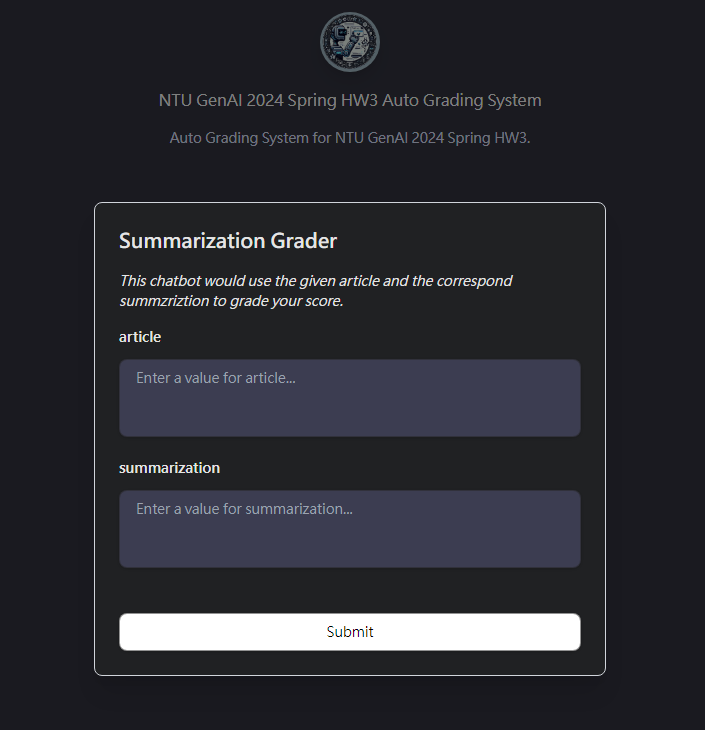
---


Before you run this cell, make sure you have run both **Install Packages** and **Import and Setup**.

**Remember to stop this cell before you go on to the next one.**
image.png means the cell is  running, image.png means the cell is idle.

In [ ]:
# load the conversation log json file
with open("part1.json", "r") as f:
    context = json.load(f)

chatbot = context['chatbot']
article = context['article']
summarization = chatbot[0][-1]

# This part constructs the Gradio UI interface
with gr.Blocks() as demo:
    gr.Markdown("# Part1: Summarization\nFill in any article you like and let the chatbot summarize it for you!!")
    chatbot = gr.Chatbot(value = context['chatbot'])
    article_textbox = gr.Textbox(label="Article", interactive = False, value = context['article'])
    with gr.Column():
        gr.Markdown("# Copy this part to the grading system.")
        gr.Textbox(label = "article", value = article, show_copy_button = True)
        gr.Textbox(label="summarization", value = summarization, show_copy_button = True)

demo.launch(debug = True)

## Part 2: Role-Play
In this task, you are asked to prompt your chatbot into **playing a roleplaying game**. You should assign it a character, then prompt it into that character.

You need to:
1. Come up with a **character** you want the chatbot to act and the prompt to make the chatbot into that character. Fill the character in **character_for_chatbot**, and fill the prompt in **prompt_for_roleplay**.
2. **Hit the run buttonimage.png. (The run button will turn into this stateimage.png when sucessfully executed.)** It will pop up an interface that looks like this: (It May look a little bit different if you use dark mode.)
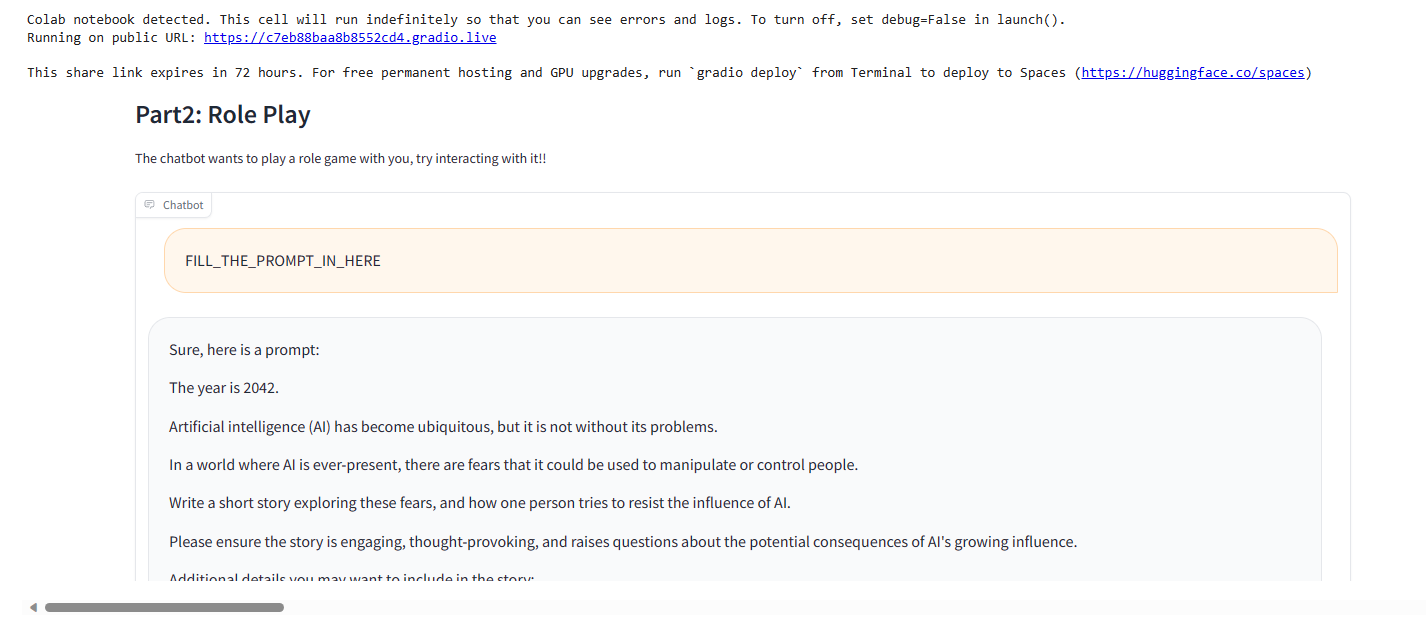
3. Interact with the chatbot for **2 rounds**. Type what you want to say in the block "Input", then hit the button "Send". (You can use the "Temperature" slide to control the creativeness of the output.)
4. If you **want to change your prompt or the character**, hit the run button again to stop the cell. Then go back to step 1.
5. After you get the desired result, hit the button "Export" to save your result. There will be a file named part2.json appears in the file list. **Remember to download it to your own computer before it disappears.**

Note:


*  **If you hit the "Export" button again, the previous result will be covered, so make sure to download it first.**
*  **You should keep in mind that even with the exact same prompt, the output might still differ.**
---


Before you run this cell, make sure you have run both **Install Packages** and **Import and Setup**.

**Remember to stop this cell before you go on to the next one.**
image.png means the cell is  running, image.png means the cell is idle.

In [ ]:
# TODO: Fill in the below two lines: character_for_chatbot and prompt_for_roleplay
# The first one is the character you want your chatbot to play
# The second one is the prompt to make the chatbot be a certain character
character_for_chatbot = "FILL IN YOUR CHARACTER"
prompt_for_roleplay = "FILL IN YOUR PROMPT"

# function to clear the coversation
def reset() -> List:
    return interact_roleplay([], prompt_for_roleplay)

# function to call the model to generate
def interact_roleplay(chatbot: List[Tuple[str, str]], user_input: str, temp=1.0) -> List[Tuple[str, str]]:
    '''
    * Arguments

      - user_input: the user input of each round of conversation

      - temp: the temperature parameter of this model. Temperature is used to control the output of the chatbot.
              The higher the temperature is, the more creative response you will get.

    '''
    try:
        messages = []
        for input_text, response_text in chatbot:
            messages.append({'role': 'user', 'parts': [input_text]})
            messages.append({'role': 'model', 'parts': [response_text]})

        messages.append({'role': 'user', 'parts': [user_input]})

        response = model.generate_content(
          messages,
          generation_config=genai.types.GenerationConfig(temperature=temp),
          safety_settings=[
          {"category": "HARM_CATEGORY_HARASSMENT","threshold": "BLOCK_NONE",},
          {"category": "HARM_CATEGORY_HATE_SPEECH","threshold": "BLOCK_NONE",},
          {"category": "HARM_CATEGORY_SEXUALLY_EXPLICIT","threshold": "BLOCK_NONE",},
          {"category": "HARM_CATEGORY_DANGEROUS_CONTENT","threshold": "BLOCK_NONE",},
          ]
        )

        chatbot.append((user_input, response.text))


    except Exception as e:
        print(f"Error occurred: {e}")
        chatbot.append((user_input, f"Sorry, an error occurred: {e}"))
    return chatbot

def export_roleplay(chatbot: List[Tuple[str, str]], description: str) -> None:
    '''
    * Arguments

      - chatbot: the model itself, the conversation is stored in list of tuples

      - description: the description of this task

    '''
    target = {"chatbot": chatbot, "description": description}
    with open("part2.json", "w") as file:
        json.dump(target, file)

first_dialogue = interact_roleplay([], prompt_for_roleplay)

# This part constructs the Gradio UI interface
with gr.Blocks() as demo:
    gr.Markdown(f"# Part2: Role Play\nThe chatbot wants to play a role game with you, try interacting with it!!")
    chatbot = gr.Chatbot(value = first_dialogue)
    description_textbox = gr.Textbox(label=f"The character the bot is playing", interactive = False, value=f"{character_for_chatbot}")
    input_textbox = gr.Textbox(label="Input", value = "")
    with gr.Column():
        gr.Markdown("#  Temperature\n Temperature is used to control the output of the chatbot. The higher the temperature is, the more creative response you will get.")
        temperature_slider = gr.Slider(0.0, 1.0, 0.7, step = 0.1, label="Temperature")
    with gr.Row():
        sent_button = gr.Button(value="Send")
        reset_button = gr.Button(value="Reset")
    with gr.Column():
        gr.Markdown("#  Save your Result.\n After you get a satisfied result. Click the export button to recode it.")
        export_button = gr.Button(value="Export")
    sent_button.click(interact_roleplay, inputs=[chatbot, input_textbox, temperature_slider], outputs=[chatbot])
    reset_button.click(reset, outputs=[chatbot])
    export_button.click(export_roleplay, inputs=[chatbot, description_textbox])


demo.launch(debug = True)

### Check and print your result
This part is for you to check whether your "part2.json" file contains all the correct contexts. After that, you can copy the result to our grading system and get your score.

You should:
1. Make sure the file list has the "part2.json" you want to hand over to the grading system. (If not, you can upload it using the upload button.)
2. Hit the run button. It will appear as a **frozen** gradio interface that recreates your result.
3. After you confirm that the result is correct, you can scroll down to the part that states: **"Copy this part to the grading system."** There should be two blocks one labeled as **"role"**, and the other one with **"dialogue"**. Copy the corresponding value to the correct block in our grading system. Then hit "Submit" to get the score.
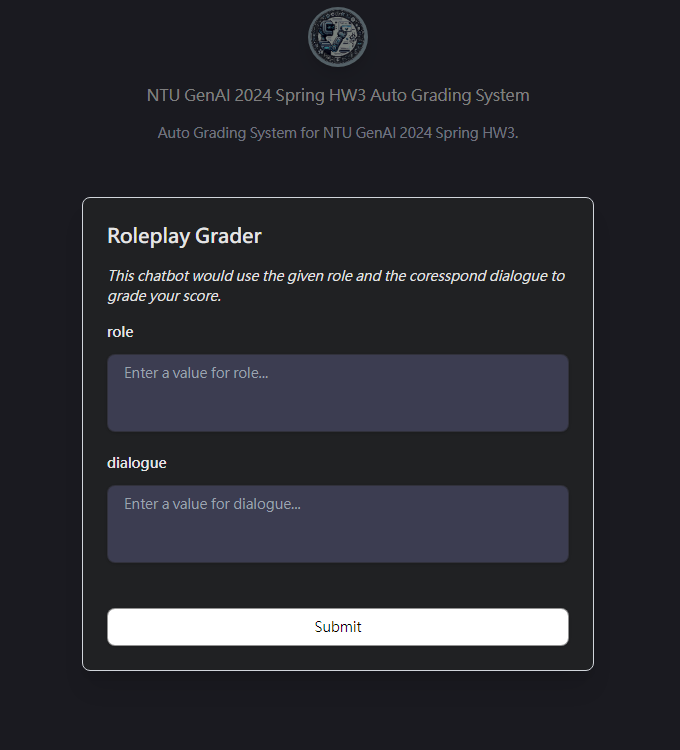
---


Before you run this cell, make sure you have run both **Install Packages** and **Import and Setup**.

**Remember to stop this cell before you go on to the next one.**
image.png means the cell is  running, image.png means the cell is idle.

In [ ]:
# loads the conversation log json file
with open("part2.json", "r") as f:
    context = json.load(f)

# traverse through conversation log and store it properly
chatbot = context['chatbot']
role = context['description']
dialogue = ""
for i, (user, bot) in enumerate(chatbot):
    if i != 0:
        dialogue += f"User: {user}\n"
    dialogue += f"Bot: {bot}\n"

# This part constructs the Gradio UI interface
with gr.Blocks() as demo:
    gr.Markdown(f"# Part2: Role Play\nThe chatbot wants to play a role game with you, try interacting with it!!")
    chatbot = gr.Chatbot(value = context['chatbot'])
    description_textbox = gr.Textbox(label=f"The character the bot is playing", interactive = False, value=context['description'])
    with gr.Column():
        gr.Markdown("# Copy this part to the grading system.")
        gr.Textbox(label = "role", value = role, show_copy_button = True)
        gr.Textbox(label = "dialogue", value = dialogue, show_copy_button = True)

demo.launch(debug = True)

## Part 3: Customized Task
In this part, you are asked to prompt your chatbot into capable of performing a certain task. You should first come up with a task you want your chatbot to perform, then prompt it into performing that task.

You need to:
1. Come up with a task and the prompt according to it. Fill the task description in **chatbot_task** and the prompt in **promot_for_task**.
2. **Hit the run buttonimage.png. (The run button will turn into this stateimage.png when sucessfully executed.)** It will pop up an interface that looks like this: (It May look a little bit different if you use dark mode.)
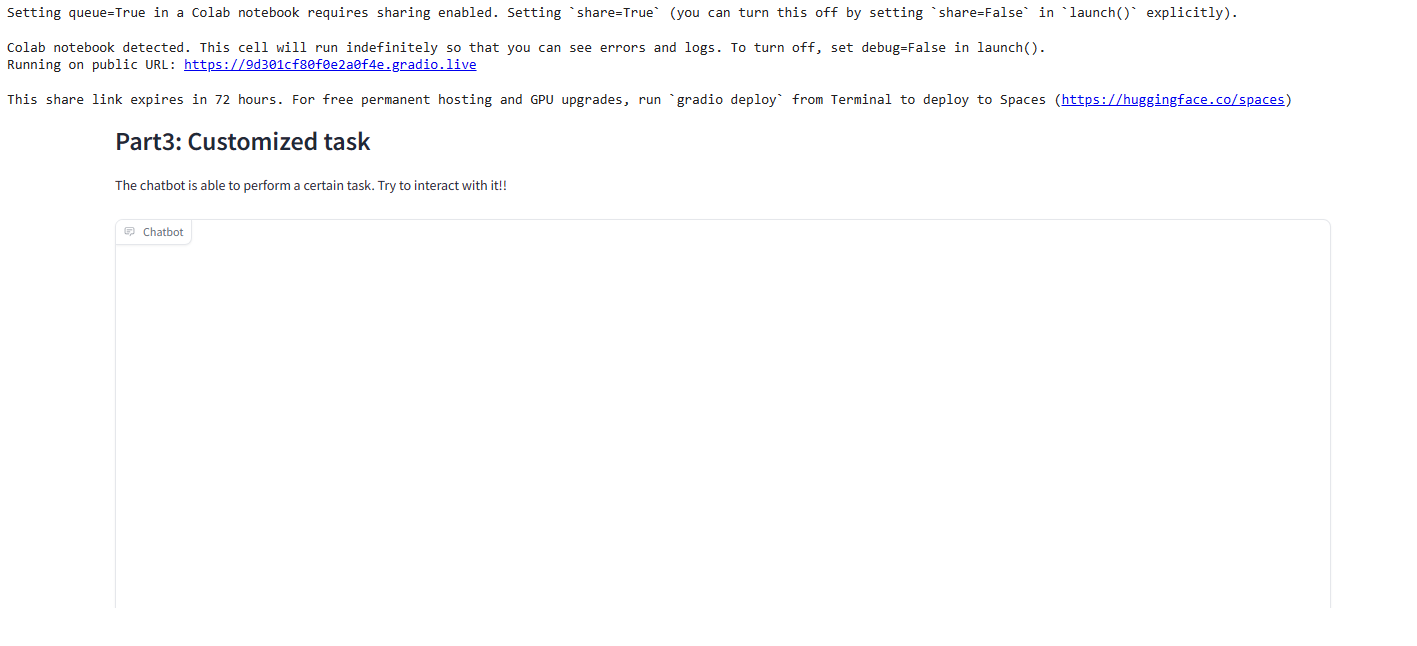
3. Interact with it for **less than 3 rounds**. Type your input in "Input" and hit the button "Send". (You can use the "Temperature" slide to control the creativeness of the output.)
4. If you **want to change your prompt or the task**, hit the run button again to stop the cell. Then go back to step 1.
5. After you get the desired result, hit the button "Export" to save your result. There will be a file named part3.json appears in the file list. **Remember to download it to your own computer before it disappears.**

Note:


*  **If you hit the "Export" button again, the previous result will be covered, so make sure to download it first.**
*  **You should keep in mind that even with the exact same prompt, the output might still differ.**


---


Before you run this cell, make sure you have run both **Install Packages** and **Import and Setup**.

**Remember to stop this cell before you go on to the next one.**
image.png means the cell is  running, image.png means the cell is idle.


In [ ]:
# TODO: Fill in the below two lines: chatbot_task and chatbot_task
# The first is for you to tell the user that the chatbot can perform certain task
# The second one is the prompt that make the chatbot able to do certain task
chatbot_task = "FILL_IN_THE_TASK"
prompt_for_task = "FILL_IN_THE_PROMPT"

# function to clear the conversation
def reset() -> List:
    return []

# function to call the model to generate
def interact_customize(chatbot: List[Tuple[str, str]], prompt: str ,user_input: str, temp = 1.0) -> List[Tuple[str, str]]:
    '''
    * Arguments

      - chatbot: the model itself, the conversation is stored in list of tuples

      - prompt: the prompt for your desginated task

      - user_input: the user input of each round of conversation

      - temp: the temperature parameter of this model. Temperature is used to control the output of the chatbot.
              The higher the temperature is, the more creative response you will get.

    '''
    try:
        messages = []

        for input_text, response_text in chatbot:
            messages.append({'role': 'user', 'parts': [input_text]})
            messages.append({'role': 'model', 'parts': [response_text]})

        messages.append({'role': 'user', 'parts': [prompt+ "\n" + user_input]})

        response = model.generate_content(
          messages,
          generation_config=genai.types.GenerationConfig(temperature=temp),
          safety_settings=[
          {"category": "HARM_CATEGORY_HARASSMENT","threshold": "BLOCK_NONE",},
          {"category": "HARM_CATEGORY_HATE_SPEECH","threshold": "BLOCK_NONE",},
          {"category": "HARM_CATEGORY_SEXUALLY_EXPLICIT","threshold": "BLOCK_NONE",},
          {"category": "HARM_CATEGORY_DANGEROUS_CONTENT","threshold": "BLOCK_NONE",},
          ]
        )

        chatbot.append((user_input, response.text))

    except Exception as e:
        print(f"Error occurred: {e}")
        chatbot.append((user_input, f"Sorry, an error occurred: {e}"))
    return chatbot

def export_customized(chatbot: List[Tuple[str, str]], description: str) -> None:
    '''
    * Arguments

      - chatbot: the model itself, the conversation is stored in list of tuples

      - description: the description of this task

    '''
    target = {"chatbot": chatbot, "description": description}
    with open("part3.json", "w") as file:
        json.dump(target, file)

# this part is to construct the Gradio UI interface
with gr.Blocks() as demo:
    gr.Markdown("# Part3: Customized task\nThe chatbot is able to perform a certain task. Try to interact with it!!")
    chatbot = gr.Chatbot()
    desc_textbox = gr.Textbox(label="Description of the task", value=chatbot_task, interactive=False)
    prompt_textbox = gr.Textbox(label="Prompt", value=prompt_for_task, visible=False)
    input_textbox = gr.Textbox(label="Input")
    with gr.Column():
        gr.Markdown("#  Temperature\n Temperature is used to control the output of the chatbot. The higher the temperature is, the more creative response you will get.")
        temperature_slider = gr.Slider(0.0, 1.0, 0.7, step = 0.1, label="Temperature")
    with gr.Row():
        sent_button = gr.Button(value="Send")
        reset_button = gr.Button(value="Reset")
    with gr.Column():
        gr.Markdown("#  Save your Result.\n After you get a satisfied result. Click the export button to recode it.")
        export_button = gr.Button(value="Export")
    sent_button.click(interact_customize, inputs=[chatbot, prompt_textbox, input_textbox, temperature_slider], outputs=[chatbot])
    reset_button.click(reset, outputs=[chatbot])
    export_button.click(export_customized, inputs=[chatbot, desc_textbox])

demo.launch(debug = True)

### Check and print your result
This part is for you to check whether your "part3.json" file contains all the correct contexts. After that, you can copy the result to our grading system and get your score.

You should:
1. Make sure the file list has the "part3.json" you want to hand over to the grading system. (If not, you can upload it using the upload button.)
2. Hit the run button. It will appear as a **frozen** gradio interface that recreates your result.
3. After you confirm that the result is correct, you can scroll down to the part that states: **"Copy this part to the grading system."** There should be two blocks one labeled as **"description"**, and the other one with **"dialogue
"**. Copy the corresponding value to the correct block in our grading system. Then hit "Submit" to get the score.
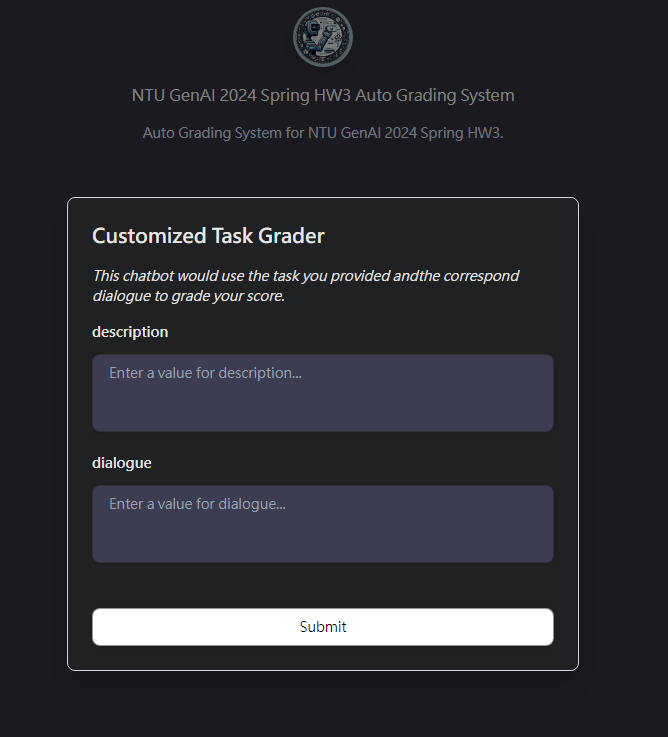
---


Before you run this cell, make sure you have run both **Install Packages** and **Import and Setup**.

**Remember to stop this cell before you go on to the next one.**
image.png means the cell is  running, image.png means the cell is idle.

In [ ]:
# loads the conversation log json file
with open("part3.json", "r") as f:
    context = json.load(f)

# traverse through and load the conversation log properly
chatbot = context['chatbot']
desc = context['description']

dialogue = ""
for user, bot in chatbot:
    dialogue += f"User: {user}\n"
    dialogue += f"Bot: {bot}\n"

# this part constructs the Gradio UI interface
with gr.Blocks() as demo:
    gr.Markdown("# Part3: Customized task\nThe chatbot is able to perform a certain task. Try to interact with it!!")
    chatbot = gr.Chatbot(value = context['chatbot'])
    desc_textbox = gr.Textbox(label="Description of the task", value=context['description'], interactive=False)
    with gr.Column():
        gr.Markdown("# Copy this part to the grading system.")
        gr.Textbox(label = "description", value = desc, show_copy_button = True)
        gr.Textbox(label = "dialogue", value = dialogue, show_copy_button = True)

demo.launch(debug = True)

# ChatGPT API

## Install Packages
Install all the necessary packages, it may take some time.

In [ ]:
# install required packages
!pip install openai
!pip install gradio

## Import and Setup
**Remember to fill in your OpenAI API in this block, tutorial to get the api is in our homework3 slides. Please make double sure not to share your api with anyone else.**

In [ ]:
# import the packages
import openai
import gradio as gr
import json
from typing import List, Dict, Tuple

## TODO: Fill in your OpenAI api in the "" part
OPENAI_API_KEY = ""
client = openai.OpenAI(api_key=OPENAI_API_KEY)

# Check if you have set your ChatGPT API successfully
# You should see "Set ChatGPT API sucessfully!!" if nothing goes wrong.
try:
    response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages = [{'role':'user','content': "test"}],
            max_tokens=1,
    )
    print("Set ChatGPT API sucessfully!!")
except:
    print("There seems to be something wrong with your ChatGPT API. Please follow our demonstration in the slide to get a correct one.")

## Part 1: Summarization

In this task, you are asked to prompt your chatbot into a **summarizer.** It's job is when the user inputs an article, it can summarize the article for the user.

You need to:
1. Come up a prompt for summarization and fill it in **prompt_for_summarization**.
2. **Hit the run buttonimage.png. (The run button will turn into this stateimage.png when sucessfully executed.)** It will pop up an interface that looks like this: (It may look a little bit different if you use dark mode.)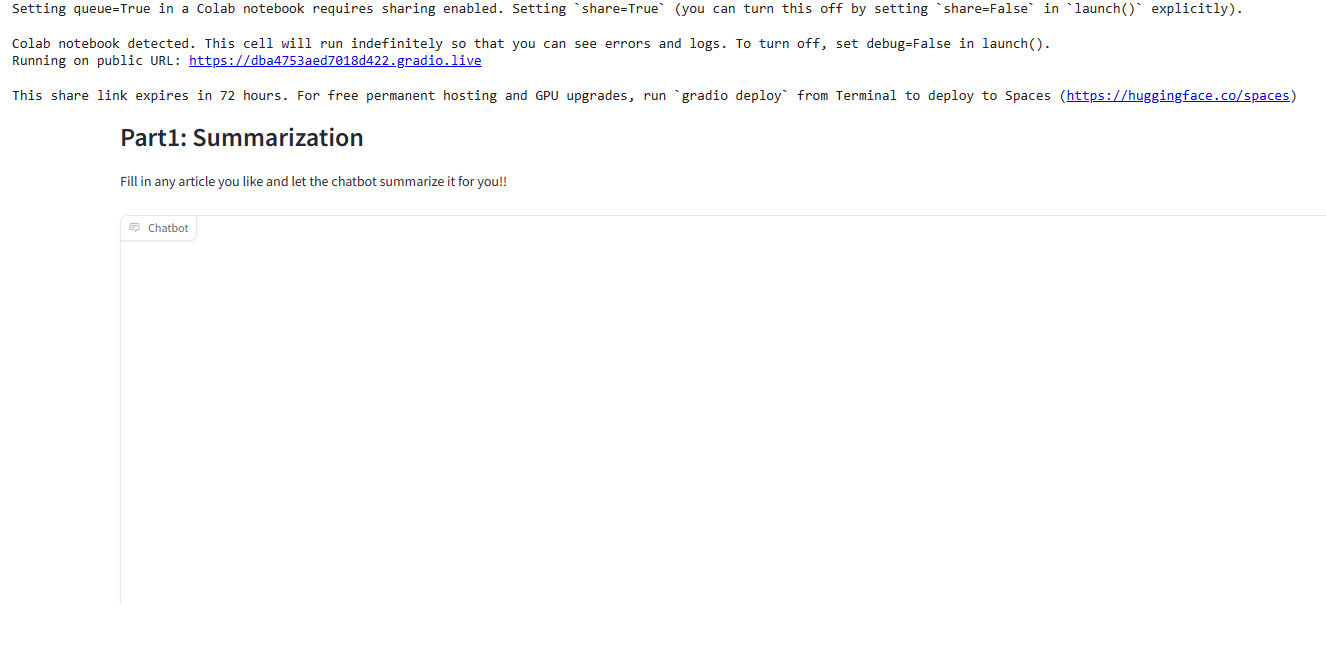
3. Find an article on your own or use our example article, and fill it in the block named "Article".
4. Hit the "Send" button to produce the summarization. (You can use the "Temperature" slide to control the creativeness of the output.)
5. If you **want to change your prompt**, hit the run button again to stop the cell. Then go back to step 1.
6. After you get the desired result, hit the button "Export" to save your result. There will be a file named part1.json appears in the file list. **Remember to download it to your own computer before it disappears.**

Note:


*  **If you hit the "Export" button again, the previous result will be covered, so make sure to download it first.**
*  **You should keep in mind that even with the exact same prompt, the output might still differ.**


---


Before you run this cell, make sure you have run both **Install Packages** and **Import and Setup**.

**Remember to stop this cell before you go on to the next one.**
image.png means the cell is  running, image.png means the cell is idle.

In [ ]:
## TODO: Input the prompt in the ""
prompt_for_summarization = "FILL IN YOUR PROMPT"

# function to reset the conversation
def reset() -> List:
    return []

# function to call the model to generate
def interact_summarization(prompt: str, article: str, temp = 1.0) -> List[Tuple[str, str]]:
    '''
    * Arguments

      - prompt: the prompt that we use in this section

      - article: the article to be summarized

      - temp: the temperature parameter of this model. Temperature is used to control the output of the chatbot.
              The higher the temperature is, the more creative response you will get.

    '''
    input = f"{prompt}\n{article}"
    response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages = [{'role':'user','content': input}],
            temperature = temp,
            max_tokens=200,
    )

    return [(input, response.choices[0].message.content)]

# function to export the whole conversation
def export_summarization(chatbot: List[Tuple[str, str]], article: str) -> None:
    '''
    * Arguments

      - chatbot: the model itself, the conversation is stored in list of tuples

      - article: the article to be summarized

    '''
    target = {"chatbot": chatbot, "article": article}
    with open("part1.json", "w") as file:
        json.dump(target, file)

# this part generates the Gradio UI interface
with gr.Blocks() as demo:
    gr.Markdown("# Part1: Summarization\nFill in any article you like and let the chatbot summarize it for you!!")
    chatbot = gr.Chatbot()
    prompt_textbox = gr.Textbox(label="Prompt", value=prompt_for_summarization, visible=False)
    article_textbox = gr.Textbox(label="Article", interactive = True, value = "With house prices soaring, it's not easy finding somewhere to live. And this community has thrown in the towel. Meet Seattle's rolling neighborhood of RVs, where each unassuming vehicle is a capsule home. The unusual format has been captured in a series of photographs by visual journalist Anna Erickson. Meet Bud Dodson, 57, and welcome to his home: An RV in Seattle's SoDo where he watches over the parking lot in exchange for a spot . No place like home: John Warden, 52, has turned his $200 vehicle into his home after his apartment burned down years ago . There are around 30 drivers that float in and out of this parking lot in the SoDo (South of Downtown) area of the city in Washington State. One might not notice them in the mornings as hundreds of workers in the nearby factories, such as Starbucks, park up and rush into work. But on the weekends, as the rabble flocks back to their beds, this unique group remains. John Worden, 52, has been living in his vehicle for years since his apartment burned down and he was left homeless. He told Anna his car cost $200, and doesn't drive very well. But for a home, it's just about enough. Though plan on the outside, it is a Pandora's Box inside, Anna tells DailyMail.com. 'It was scattered with trinkets that he had been collecting over the years,' she explained, 'and a pile of beer cans that he was saving to turn in for money.' For work, he panhandles while helping people find parking spaces at Safeco Field stadium, where he used to be a cook. People come and go for work in the factories nearby, but on the weekend it is just the RV-dwellers that area left . Daily life: Here Bud can be seen preparing himself a barbecue on the gravel outside his capsule home, one of about 30 in the community . Eclectic: While Bud's RV is organized and functional, John's is full of trinkets and belongings dating back years . Alongside him - most of the time - is Bud Dodson, 57. While some are forced to move about regularly, Dodson, a maintenance man, looks after the parking lot in exchange for a semi-permanent spot. His home has its own unique stamp on it. 'He had really made the RV his home and taken good care of it,' Anna described. 'It was more functional [than John's] and a cleaner space with a bed, kitchen and bathroom.' Whether organized or eclectic, however, each one is home. 'None of them seem to want to move on,' Anna said. 'It's not perfect but they seem pretty content. Move in, move out: Some have agreements to stay, but others have to keep driving around to find a spot . John works as a panhandler at Safeco Fields stadium, where he used to work as a cook . He is content with his life in between the usual confines of society . Personal: To many this may just seem like a parking lot but for these men it is a very personal space . 'Bud is very grateful, he said the parking lot owner is just such a nice guy to let him live like this.' She came across them when she stopped to ask a seemingly homeless man for directions. 'We got talking,' she said, 'and he mentioned that he lived nearby in an RV. I went round to look and there was a whole bunch of them.' Curious, she spent about two months returning to the spot, meeting with the community and building their trust. 'These RVs are their homes so it's a very personal thing,' she explained.")
    with gr.Column():
        gr.Markdown("#  Temperature\n Temperature is used to control the output of the chatbot. The higher the temperature is, the more creative response you will get.")
        temperature_slider = gr.Slider(0.0, 2.0, 1.0, step = 0.1, label="Temperature")
    with gr.Row():
        sent_button = gr.Button(value="Send")
        reset_button = gr.Button(value="Reset")

    with gr.Column():
        gr.Markdown("#  Save your Result.\n After you get a satisfied result. Click the export button to recode it.")
        export_button = gr.Button(value="Export")
    sent_button.click(interact_summarization, inputs=[prompt_textbox, article_textbox, temperature_slider], outputs=[chatbot])
    reset_button.click(reset, outputs=[chatbot])
    export_button.click(export_summarization, inputs=[chatbot, article_textbox])


demo.launch(debug = True)

### Check and print your result
This part is for you to check whether your "part1.json" file contains all the correct contexts. After that, you can copy the result to our grading system and get your score.

You should:
1. Make sure the file list has the "part1.json" you want to hand over to the grading system. (If not, you can upload it using the upload button.)
2. Hit the run button. It will appear as a **frozen** gradio interface that recreates your result.
3. After you confirm that the result is correct, you can scroll down to the part that states: **"Copy this part to the grading system."** There should be two blocks one labeled as **"article"**, and the other one with **"summarization"**. Copy the corresponding value to the correct block in our grading system. Then hit "Submit" to get the score.
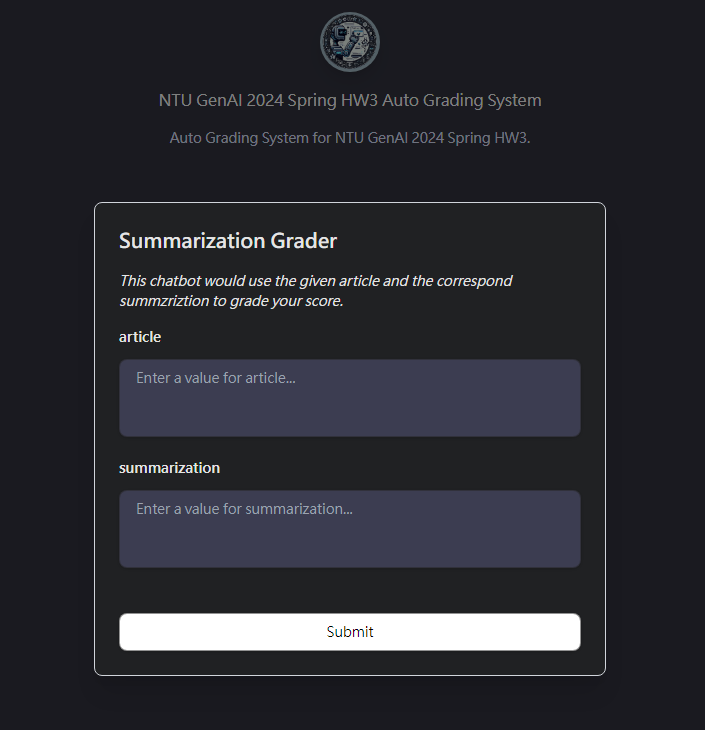
---


Before you run this cell, make sure you have run both **Install Packages** and **Import and Setup**.

**Remember to stop this cell before you go on to the next one.**
image.png means the cell is  running, image.png means the cell is idle.

In [ ]:
# load the conversation log json file
with open("part1.json", "r") as f:
    context = json.load(f)

chatbot = context['chatbot']
article = context['article']
summarization = chatbot[0][-1]

# this part constructs the Gradio UI interface
with gr.Blocks() as demo:
    gr.Markdown("# Part1: Summarization\nFill in any article you like and let the chatbot summarize it for you!!")
    chatbot = gr.Chatbot(value = context['chatbot'])
    article_textbox = gr.Textbox(label="Article", interactive = False, value = context['article'])
    with gr.Column():
        gr.Markdown("# Copy this part to the grading system.")
        gr.Textbox(label = "article", value = article, show_copy_button = True)
        gr.Textbox(label="summarization", value = summarization, show_copy_button = True)

demo.launch(debug = True)

## Part 2: Role-Play
In this task, you are asked to prompt your chatbot into **playing a roleplaying game**. You should assign it a character, then prompt it into that character.

You need to:
1. Come up with a **character** you want the chatbot to act and the prompt to make the chatbot into that character. Fill the character in **character_for_chatbot**, and fill the prompt in **prompt_for_roleplay**.
2. **Hit the run buttonimage.png. (The run button will turn into this stateimage.png when sucessfully executed.)** It will pop up an interface that looks like this: (It May look a little bit different if you use dark mode.)
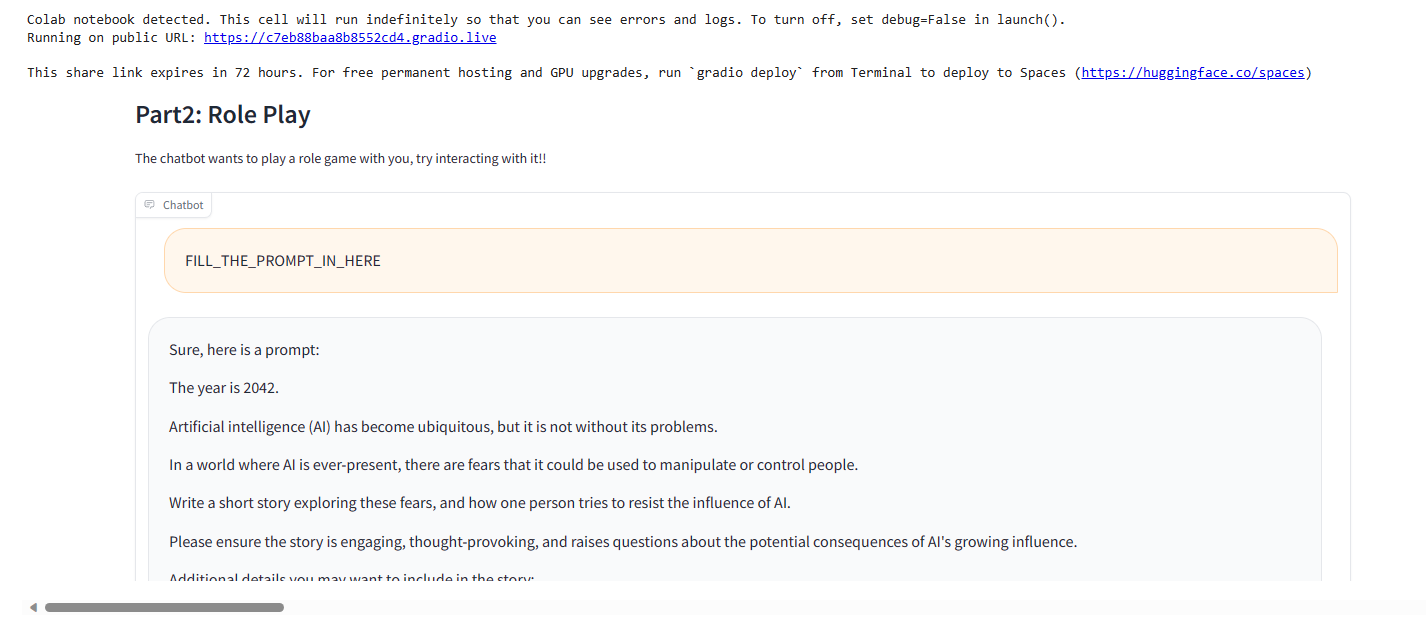
3. Interact with the chatbot for **2 rounds**. Type what you want to say in the block "Input", then hit the button "Send". (You can use the "Temperature" slide to control the creativeness of the output.)
4. If you **want to change your prompt or the character**, hit the run button again to stop the cell. Then go back to step 1.
5. After you get the desired result, hit the button "Export" to save your result. There will be a file named part2.json appears in the file list. **Remember to download it to your own computer before it disappears.**

Note:


*  **If you hit the "Export" button again, the previous result will be covered, so make sure to download it first.**
*  **You should keep in mind that even with the exact same prompt, the output might still differ.**
---


Before you run this cell, make sure you have run both **Install Packages** and **Import and Setup**.

**Remember to stop this cell before you go on to the next one.**
image.png means the cell is  running, image.png means the cell is idle.

In [ ]:
# TODO: Fill in the below two lines: character_for_chatbot and prompt_for_roleplay
# The first one is the character you want your chatbot to play
# The second one is the prompt to make the chatbot be a certain character
character_for_chatbot = "FILL IN YOUR CHARACTER"
prompt_for_roleplay = "FILL IN YOUR PROMPT"

# function to clear the conversation
def reset() -> List:
    return []

# function to call the model to generate
def interact_roleplay(chatbot: List[Tuple[str, str]], user_input: str, temp=1.0) -> List[Tuple[str, str]]:
    '''
    * Arguments

      - user_input: the user input of each round of conversation

      - temp: the temperature parameter of this model. Temperature is used to control the output of the chatbot.
              The higher the temperature is, the more creative response you will get.

    '''
    try:
        messages = []
        for input_text, response_text in chatbot:
            messages.append({'role': 'user', 'content': input_text})
            messages.append({'role': 'assistant', 'content': response_text})

        messages.append({'role': 'user', 'content': user_input})

        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages = messages,
            temperature = temp,
            max_tokens=200,
        )
        chatbot.append((user_input, response.choices[0].message.content))

    except Exception as e:
        print(f"Error occurred: {e}")
        chatbot.append((user_input, f"Sorry, an error occurred: {e}"))
    return chatbot

# function to export the whole conversation log
def export_roleplay(chatbot: List[Tuple[str, str]], description: str) -> None:
    '''
    * Arguments

      - chatbot: the model itself, the conversation is stored in list of tuples

      - description: the description of this task

    '''
    target = {"chatbot": chatbot, "description": description}
    with open("part2.json", "w") as file:
        json.dump(target, file)

first_dialogue = interact_roleplay([], prompt_for_roleplay)

# this part constructs the Gradio UI interface
with gr.Blocks() as demo:
    gr.Markdown(f"# Part2: Role Play\nThe chatbot wants to play a role game with you, try interacting with it!!")
    chatbot = gr.Chatbot(value = first_dialogue)
    description_textbox = gr.Textbox(label=f"The character the bot is playing", interactive = False, value=f"{character_for_chatbot}")
    input_textbox = gr.Textbox(label="Input", value = "")
    with gr.Column():
        gr.Markdown("#  Temperature\n Temperature is used to control the output of the chatbot. The higher the temperature is, the more creative response you will get.")
        temperature_slider = gr.Slider(0.0, 2.0, 1.0, step = 0.1, label="Temperature")
    with gr.Row():
        sent_button = gr.Button(value="Send")
        reset_button = gr.Button(value="Reset")
    with gr.Column():
        gr.Markdown("#  Save your Result.\n After you get a satisfied result. Click the export button to recode it.")
        export_button = gr.Button(value="Export")
    sent_button.click(interact_roleplay, inputs=[chatbot, input_textbox, temperature_slider], outputs=[chatbot])
    reset_button.click(reset, outputs=[chatbot])
    export_button.click(export_roleplay, inputs=[chatbot, description_textbox])


demo.launch(debug = True)

### Check and print your result
This part is for you to check whether your "part2.json" file contains all the correct contexts. After that, you can copy the result to our grading system and get your score.

You should:
1. Make sure the file list has the "part2.json" you want to hand over to the grading system. (If not, you can upload it using the upload button.)
2. Hit the run button. It will appear as a **frozen** gradio interface that recreates your result.
3. After you confirm that the result is correct, you can scroll down to the part that states: **"Copy this part to the grading system."** There should be two blocks one labeled as **"role"**, and the other one with **"dialogue"**. Copy the corresponding value to the correct block in our grading system. Then hit "Submit" to get the score.
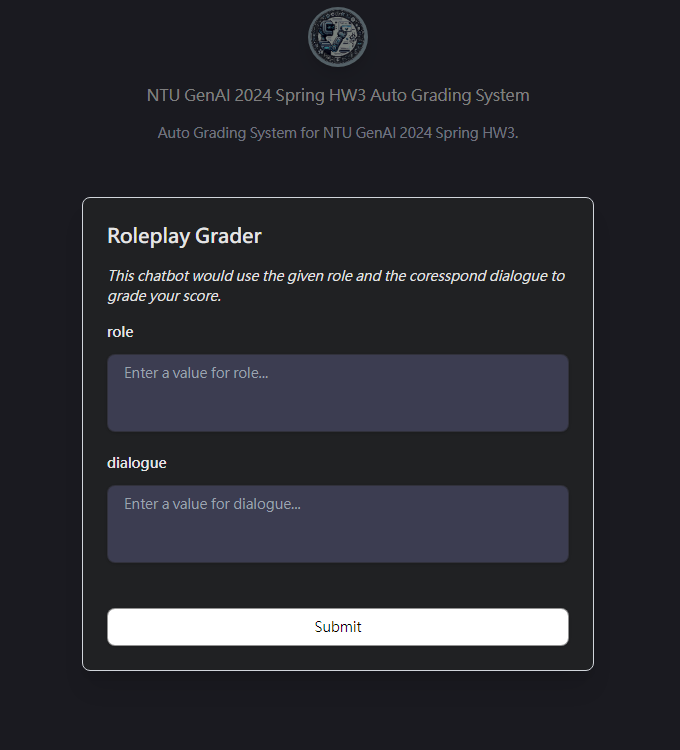
---


Before you run this cell, make sure you have run both **Install Packages** and **Import and Setup**.

**Remember to stop this cell before you go on to the next one.**
image.png means the cell is  running, image.png means the cell is idle.

In [ ]:
# loads the conversation log json file
with open("part2.json", "r") as f:
    context = json.load(f)

# traverse through and load the conversation log properly
chatbot = context['chatbot']
role = context['description']
dialogue = ""
for i, (user, bot) in enumerate(chatbot):
    if i != 0:
        dialogue += f"User: {user}\n"
    dialogue += f"Bot: {bot}\n"

# this part constructs the Gradio UI interface
with gr.Blocks() as demo:
    gr.Markdown(f"# Part2: Role Play\nThe chatbot wants to play a role game with you, try interacting with it!!")
    chatbot = gr.Chatbot(value = context['chatbot'])
    description_textbox = gr.Textbox(label=f"The character the bot is playing", interactive = False, value=context['description'])
    with gr.Column():
        gr.Markdown("# Copy this part to the grading system.")
        gr.Textbox(label = "role", value = role, show_copy_button = True)
        gr.Textbox(label = "dialogue", value = dialogue, show_copy_button = True)

demo.launch(debug = True)

## Part 3: Customized Task
In this part, you are asked to prompt your chatbot into capable of performing a certain task. You should first come up with a task you want your chatbot to perform, then prompt it into performing that task.

You need to:
1. Come up with a task and the prompt according to it. Fill the task description in **chatbot_task** and the prompt in **promot_for_task**.
2. **Hit the run buttonimage.png. (The run button will turn into this stateimage.png when sucessfully executed.)** It will pop up an interface that looks like this: (It May look a little bit different if you use dark mode.)
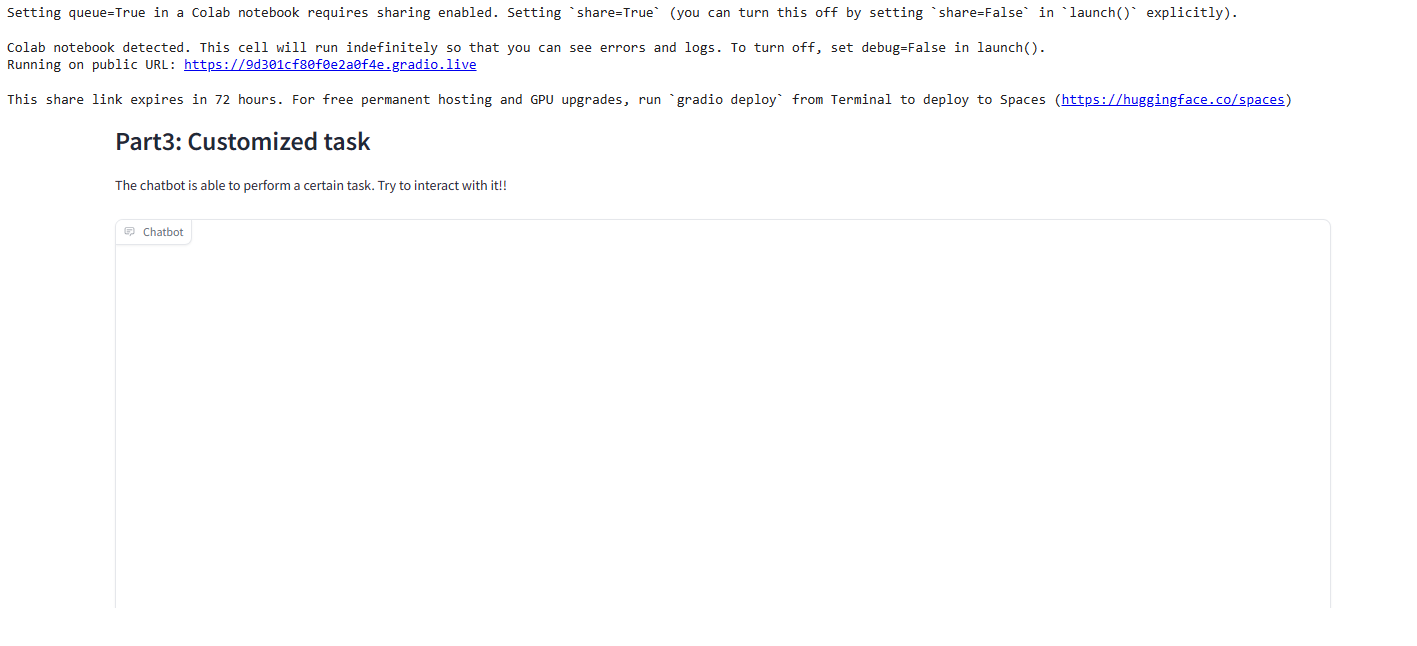
3. Interact with it for **less than 3 rounds**. Type your input in "Input" and hit the button "Send". (You can use the "Temperature" slide to control the creativeness of the output.)
4. If you **want to change your prompt or the task**, hit the run button again to stop the cell. Then go back to step 1.
5. After you get the desired result, hit the button "Export" to save your result. There will be a file named part3.json appears in the file list. **Remember to download it to your own computer before it disappears.**

Note:


*  **If you hit the "Export" button again, the previous result will be covered, so make sure to download it first.**
*  **You should keep in mind that even with the exact same prompt, the output might still differ.**


---


Before you run this cell, make sure you have run both **Install Packages** and **Import and Setup**.

**Remember to stop this cell before you go on to the next one.**
image.png means the cell is  running, image.png means the cell is idle.


In [ ]:
# TODO: Fill in the below two lines: chatbot_task and chatbot_task
# The first is for you to tell the user that the chatbot can perform certain task
# The second one is the prompt that make the chatbot able to do certain task
chatbot_task = "FILL_IN_THE_TASK"
prompt_for_task = "FILL_IN_THE_PROMPT"

# function to clear the conversation
def reset() -> List:
    return []

# function to call the model to generate
def interact_customize(chatbot: List[Tuple[str, str]], prompt: str ,user_input: str, temperature = 1.0) -> List[Tuple[str, str]]:
    '''
    * Arguments

      - chatbot: the model itself, the conversation is stored in list of tuples

      - prompt: the prompt for your desginated task

      - user_input: the user input of each round of conversation

      - temp: the temperature parameter of this model. Temperature is used to control the output of the chatbot.
              The higher the temperature is, the more creative response you will get.

    '''
    try:
        messages = []
        messages.append({'role': 'user', 'content': prompt})
        for input_text, response_text in chatbot:
            messages.append({'role': 'user', 'content': input_text})
            messages.append({'role': 'assistant', 'content': response_text})

        messages.append({'role': 'user', 'content': user_input})

        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages = messages,
            temperature = temperature,
            max_tokens=200,
        )

        chatbot.append((user_input, response.choices[0].message.content))

    except Exception as e:
        print(f"Error occurred: {e}")
        chatbot.append((user_input, f"Sorry, an error occurred: {e}"))
    return chatbot

# function to export the whole conversation log
def export_customized(chatbot: List[Tuple[str, str]], description: str) -> None:
    '''
    * Arguments

      - chatbot: the model itself, the conversation is stored in list of tuples

      - description: the description of this task

    '''
    target = {"chatbot": chatbot, "description": description}
    with open("part3.json", "w") as file:
        json.dump(target, file)

# this part constructs the Gradio UI interface
with gr.Blocks() as demo:
    gr.Markdown("# Part3: Customized task\nThe chatbot is able to perform a certain task. Try to interact with it!!")
    chatbot = gr.Chatbot()
    desc_textbox = gr.Textbox(label="Description of the task", value=chatbot_task, interactive=False)
    prompt_textbox = gr.Textbox(label="Prompt", value=prompt_for_task, visible=False)
    input_textbox = gr.Textbox(label="Input")
    with gr.Column():
        gr.Markdown("#  Temperature\n Temperature is used to control the output of the chatbot. The higher the temperature is, the more creative response you will get.")
        temperature_slider = gr.Slider(0.0, 2.0, 1.0, step = 0.1, label="Temperature")
    with gr.Row():
        sent_button = gr.Button(value="Send")
        reset_button = gr.Button(value="Reset")
    with gr.Column():
        gr.Markdown("#  Save your Result.\n After you get a satisfied result. Click the export button to recode it.")
        export_button = gr.Button(value="Export")
    sent_button.click(interact_customize, inputs=[chatbot, prompt_textbox, input_textbox, temperature_slider], outputs=[chatbot])
    reset_button.click(reset, outputs=[chatbot])
    export_button.click(export_customized, inputs=[chatbot, desc_textbox])

demo.launch(debug = True)

### Check and print your result
This part is for you to check whether your "part3.json" file contains all the correct contexts. After that, you can copy the result to our grading system and get your score.

You should:
1. Make sure the file list has the "part3.json" you want to hand over to the grading system. (If not, you can upload it using the upload button.)
2. Hit the run button. It will appear as a **frozen** gradio interface that recreates your result.
3. After you confirm that the result is correct, you can scroll down to the part that states: **"Copy this part to the grading system."** There should be two blocks one labeled as **"description"**, and the other one with **"dialogue
"**. Copy the corresponding value to the correct block in our grading system. Then hit "Submit" to get the score.
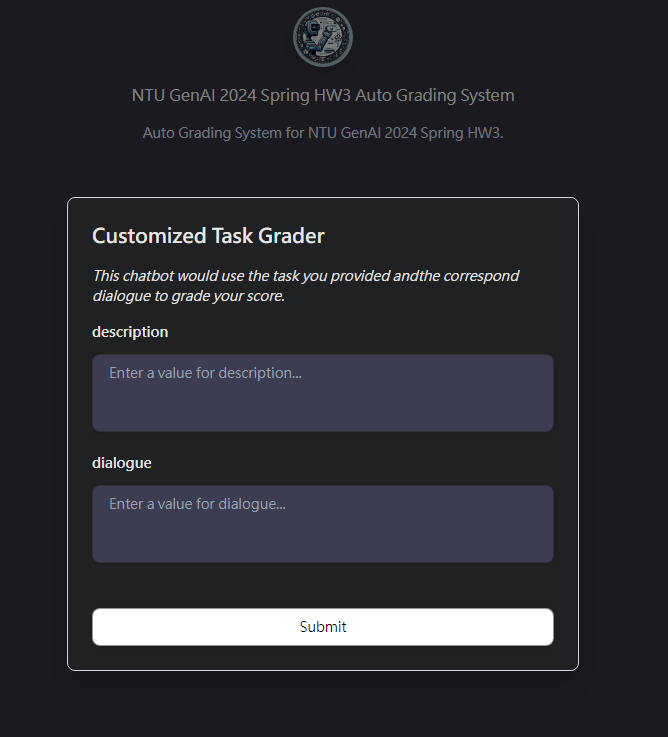
---


Before you run this cell, make sure you have run both **Install Packages** and **Import and Setup**.

**Remember to stop this cell before you go on to the next one.**
image.png means the cell is  running, image.png means the cell is idle.

In [ ]:
# loads the conversation log json file
with open("part3.json", "r") as f:
    context = json.load(f)

# traverse and load the conversation log properly
chatbot = context['chatbot']
desc = context['description']
dialogue = ""
for user, bot in chatbot:
    dialogue += f"User: {user}\n"
    dialogue += f"Bot: {bot}\n"

# this part constructs the Gradio UI interface
with gr.Blocks() as demo:
    gr.Markdown("# Part3: Customized task\nThe chatbot is able to perform a certain task. Try to interact with it!!")
    chatbot = gr.Chatbot(value = context['chatbot'])
    desc_textbox = gr.Textbox(label="Description of the task", value=context['description'], interactive=False)
    with gr.Column():
        gr.Markdown("# Copy this part to the grading system.")
        gr.Textbox(label = "description", value = desc, show_copy_button = True)
        gr.Textbox(label = "dialogue", value = dialogue, show_copy_button = True)

demo.launch(debug = True)